#데이터 분석

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 불러오기
f1=pd.read_csv("/content/drive/MyDrive/전기_분석_데이터/제주전력시장_현황데이터.csv")
f2=pd.read_csv("/content/drive/MyDrive/전기_분석_데이터/제주전력시장_시장전기가격_실시간가격.csv")#실제 가격이 들어있는 데이터
f3=pd.read_csv("/content/drive/MyDrive/전기_분석_데이터/기상실측데이터_1.csv")
f4=pd.read_csv("/content/drive/MyDrive/전기_분석_데이터/기상실측데이터_2.csv")
f5=pd.read_csv("/content/drive/MyDrive/전기_분석_데이터/제주전력시장_시장전기가격_하루전가격.csv")

In [ ]:
f1

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,1704034800,1298000.0,769000.0,0.0,125426.0,133103.0,529000.0,323000.0
1,1704035100,1299000.0,761000.0,0.0,130393.0,137867.0,538000.0,339000.0
2,1704035400,1290000.0,755000.0,0.0,120691.0,128133.0,534000.0,335000.0
3,1704035700,1277000.0,756000.0,0.0,107771.0,115519.0,521000.0,325000.0
4,1704036000,1269000.0,753000.0,0.0,99264.4,107153.0,515000.0,318000.0
...,...,...,...,...,...,...,...,...
84075,1729607700,1254000.0,624000.0,0.0,247628.0,256210.0,625000.0,277000.0
84076,1729608000,1248000.0,618000.0,0.0,246598.0,255217.0,627000.0,277000.0
84077,1729608300,1255000.0,621000.0,0.0,251494.0,260161.0,630000.0,281000.0
84078,1729608600,1259000.0,612000.0,0.0,252912.0,261535.0,642000.0,290000.0


In [ ]:
f2

,ts,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,1709218800,95.30,95.30
1,1709222400,107.39,107.39
2,1709226000,95.30,95.30
3,1709229600,87.89,87.89
4,1709233200,86.50,86.50
...,...,...,...
5612,1729508400,156.43,155.32
5613,1729512000,156.35,155.32
5614,1729515600,155.89,154.80
5615,1729519200,155.23,154.89


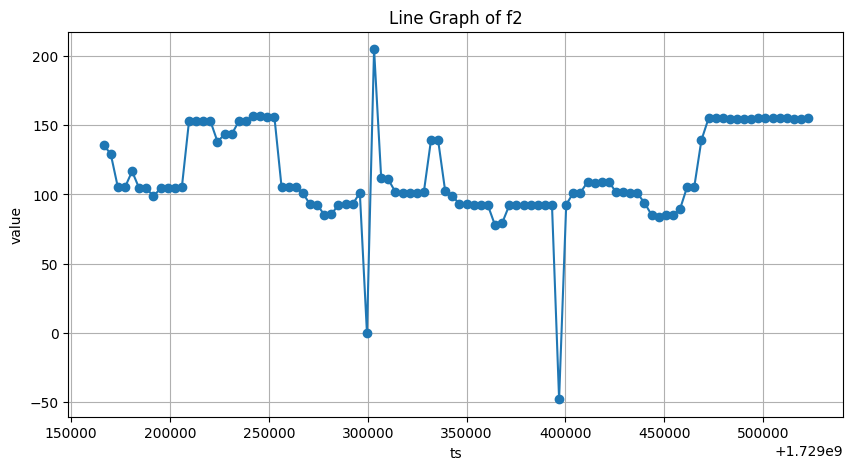

In [ ]:
import matplotlib.pyplot as plt
recent_500 = f2.tail(100)
# 선 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(recent_500['ts'], recent_500['실시간 확정 가격(원/kWh)'], marker='o', linestyle='-')
plt.title('Line Graph of f2')
plt.xlabel('ts')
plt.ylabel('value')
plt.grid(True)
plt.show()


In [ ]:
f3

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64652,Sangmo-ri,1729594920,20.0,18.0,18.0,100.0,20.0,293.0,37.8,37.8,0.0,14.5,76.0,579.0,1014.6,20.6,20.0,20.0,0.0
64653,Sangmo-ri,1729598520,19.8,16.9,16.9,100.0,19.8,293.0,41.8,41.8,0.0,14.5,91.0,579.0,1014.2,20.6,20.0,19.8,0.1
64654,Sangmo-ri,1729601760,21.2,18.5,18.5,92.0,19.9,315.0,49.7,49.7,0.0,22.5,99.0,457.0,1015.0,21.7,21.1,20.4,0.0
64655,Sangmo-ri,1729602120,19.6,16.7,16.7,100.0,19.6,315.0,49.7,49.7,0.0,22.5,99.0,518.0,1013.9,20.6,19.4,19.5,0.0


In [ ]:
f4

,location,ts,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,Gaigeturi,1709218856,80.0,8.03,8.03,8.03,73.0,1023.0,10.34,352.0,0.0,0.0
1,Gaigeturi,1709220664,75.0,8.03,8.03,8.03,66.0,1022.0,3.09,340.0,0.0,0.0
2,Gaigeturi,1709222454,85.0,7.75,7.75,7.75,71.0,1023.0,11.28,350.0,0.0,0.0
3,Gaigeturi,1709224276,75.0,8.03,8.03,8.03,66.0,1022.0,4.63,340.0,0.0,0.0
4,Gaigeturi,1709226058,88.0,7.11,7.11,7.11,66.0,1024.0,11.8,352.0,0.31,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34007,Jeju,1729600283,75.0,21.96,21.96,21.96,83.0,1016.0,6.17,270.0,0.53,0.0
34008,Jeju,1729602067,75.0,19.96,19.96,19.96,94.0,1016.0,10.8,300.0,0.53,0.0
34009,Jeju,1729603843,75.0,19.96,19.96,19.96,88.0,1016.0,10.8,290.0,0.48,0.0
34010,Jeju,1729605674,100.0,20.29,20.29,20.29,92.0,1016.0,9.07,299.0,0.48,0.0


In [ ]:
merged_df_f1_f2 = pd.merge(f1, f2, on='ts', how='inner')  # inner join: 공통된 ts 값만 병합

In [ ]:
# 상관계수 행렬 계산
correlation_matrix = merged_df_f1_f2.corr()

# 상관계수 행렬 텍스트로 출력
print("상관계수 행렬: f1 f2")
correlation_matrix


상관계수 행렬: f1 f2


,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
ts,1.000000,0.197346,0.164923,-0.032366,0.020471,-0.022865,-0.010243,-0.178042,0.148819,0.148701
공급능력(kW),0.197346,1.000000,0.394502,0.535074,0.385824,0.697938,0.481064,0.402993,-0.010568,-0.010592
현재 수요(kW),0.164923,0.394502,1.000000,0.043038,0.037218,0.060250,-0.613332,-0.330733,0.485048,0.487487
태양광 발전량kW),-0.032366,0.535074,0.043038,1.000000,-0.111466,0.792807,0.422554,0.571602,-0.238118,-0.235819
풍력 발전량(kW),0.020471,0.385824,0.037218,-0.111466,1.000000,0.516034,0.293209,0.140496,-0.070615,-0.071827
신재생 발전량 총합(kW),-0.022865,0.697938,0.060250,0.792807,0.516034,1.000000,0.544299,0.580181,-0.251312,-0.250240
공급 예비력(kW),-0.010243,0.481064,-0.613332,0.422554,0.293209,0.544299,1.000000,0.669497,-0.474198,-0.476494
운영 예비력(kW),-0.178042,0.402993,-0.330733,0.571602,0.140496,0.580181,0.669497,1.000000,-0.386749,-0.383857
실시간 임시 가격(원/kWh),0.148819,-0.010568,0.485048,-0.238118,-0.070615,-0.251312,-0.474198,-0.386749,1.000000,0.989046
실시간 확정 가격(원/kWh),0.148701,-0.010592,0.487487,-0.235819,-0.071827,-0.250240,-0.476494,-0.383857,0.989046,1.000000


In [ ]:
correlation_matrix

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 확정 가격(원/kWh)
ts,1.000000,0.197346,0.164923,-0.032366,0.020471,-0.022865,-0.010243,-0.178042,0.148701
공급능력(kW),0.197346,1.000000,0.394502,0.535074,0.385824,0.697938,0.481064,0.402993,-0.010592
현재 수요(kW),0.164923,0.394502,1.000000,0.043038,0.037218,0.060250,-0.613332,-0.330733,0.487487
태양광 발전량kW),-0.032366,0.535074,0.043038,1.000000,-0.111466,0.792807,0.422554,0.571602,-0.235819
풍력 발전량(kW),0.020471,0.385824,0.037218,-0.111466,1.000000,0.516034,0.293209,0.140496,-0.071827
신재생 발전량 총합(kW),-0.022865,0.697938,0.060250,0.792807,0.516034,1.000000,0.544299,0.580181,-0.250240
공급 예비력(kW),-0.010243,0.481064,-0.613332,0.422554,0.293209,0.544299,1.000000,0.669497,-0.476494
운영 예비력(kW),-0.178042,0.402993,-0.330733,0.571602,0.140496,0.580181,0.669497,1.000000,-0.383857
실시간 확정 가격(원/kWh),0.148701,-0.010592,0.487487,-0.235819,-0.071827,-0.250240,-0.476494,-0.383857,1.000000


In [ ]:
# 숫자로 변환 불가능한 값들은 NaN으로 설정
f2['ts'] = pd.to_numeric(f2['ts'], errors='coerce')
f3['ts'] = pd.to_numeric(f3['ts'], errors='coerce')
f4['ts'] = pd.to_numeric(f4['ts'], errors='coerce')

# NaN 값이 포함된 행 제거
f2 = f2.dropna(subset=['ts'])
f3 = f3.dropna(subset=['ts'])
f4 = f4.dropna(subset=['ts'])

# ts를 int로 변환
f2['ts'] = f2['ts'].astype(int)
f3['ts'] = f3['ts'].astype(int)
f4['ts'] = f4['ts'].astype(int)
# 병합 수행
merged_df_f2_f3 = pd.merge(f2, f3, on='ts', how='inner')
merged_df_f2_f4 = pd.merge(f2, f4, on='ts', how='inner')


<ipython-input-7-72888b84cd50>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f3['ts'] = f3['ts'].astype(int)
<ipython-input-7-72888b84cd50>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f4['ts'] = f4['ts'].astype(int)


In [ ]:
# f2와 f4의 'ts' 열을 기준으로 공통된 키 값으로 병합
common_ts = pd.merge(f2, f4, on='ts', how='inner')

# 공통된 'ts' 값 개수 출력
common_count = common_ts['ts'].nunique()
print("f2와 f4에 공통된 'ts' 값의 개수:", common_count)


f2와 f4에 공통된 'ts' 값의 개수: 4


In [ ]:
merged_df_f2_f4

,ts,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),location,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,1714111200,142.58,142.58,Jeju,75.0,17.96,17.96,17.96,72.0,1010.0,4.12,50.0,0.0,0.0
1,1715619600,102.53,102.53,Jeju,0.0,11.96,11.96,11.96,66.0,1016.0,1.54,210.0,0.0,0.0
2,1723737600,139.87,139.87,Jeju,0.0,26.96,26.96,26.96,83.0,1008.0,1.03,70.0,7.49,0.0
3,1725616800,160.30,160.72,Jeju,75.0,28.96,28.96,28.96,74.0,1012.0,2.57,230.0,0.0,0.0


In [ ]:
f3.head()

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0


In [ ]:
f4.head()

,location,ts,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,Gaigeturi,1709218856,80.0,8.03,8.03,8.03,73.0,1023.0,10.34,352.0,0.0,0.0
1,Gaigeturi,1709220664,75.0,8.03,8.03,8.03,66.0,1022.0,3.09,340.0,0.0,0.0
2,Gaigeturi,1709222454,85.0,7.75,7.75,7.75,71.0,1023.0,11.28,350.0,0.0,0.0
3,Gaigeturi,1709224276,75.0,8.03,8.03,8.03,66.0,1022.0,4.63,340.0,0.0,0.0
4,Gaigeturi,1709226058,88.0,7.11,7.11,7.11,66.0,1024.0,11.8,352.0,0.31,0.0


In [ ]:
merged_df = pd.merge(f3, f2, on='ts', how='inner')

ValueError: You are trying to merge on object and int64 columns for key 'ts'. If you wish to proceed you should use pd.concat

In [ ]:
f3.head()

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0


In [ ]:
f2.head()

,ts,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,1709218800,95.30,95.30
1,1709222400,107.39,107.39
2,1709226000,95.30,95.30
3,1709229600,87.89,87.89
4,1709233200,86.50,86.50


In [ ]:
merged_df = pd.merge(f3, f2, on='ts', how='inner')

# 병합 결과 출력
print("병합된 데이터프레임:")
print(merged_df.head())

ValueError: You are trying to merge on object and int64 columns for key 'ts'. If you wish to proceed you should use pd.concat

In [ ]:
# ts 열을 문자열형으로 변환
f3['ts'] = f3['ts'].astype(str)
f2['ts'] = f2['ts'].astype(str)

# 병합 수행
merged_df = pd.merge(f3, f2, on='ts', how='inner')
print("병합된 데이터프레임:")
print(merged_df.head())


병합된 데이터프레임:
   location          ts  temp real_feel_temp real_feel_temp_shade rel_hum  \
0  Ilgwa-ri  1709384400   6.1            1.1                  1.1    53.0   
1  Ilgwa-ri  1709938800   5.6            4.9                  3.3    50.0   
2  Ilgwa-ri  1709946000   7.2            4.3                  1.5    49.0   
3  Ilgwa-ri  1710122400  14.0           11.8                  9.7    65.0   
4  Ilgwa-ri  1710388800  13.6           15.5                 11.6    57.0   

  dew_point wind_dir wind_spd wind_gust_spd  ...   vis cld_cvr  ceiling  \
0      -2.8    270.0     16.2          21.1  ...  24.1    69.0   9144.0   
1      -4.1    315.0     11.2          11.2  ...  16.1    72.0  10058.0   
2      -2.8    315.0     24.9          33.3  ...  24.1    59.0   9144.0   
3       7.5    180.0     25.9          25.9  ...  16.1    76.0   9144.0   
4       5.1    158.0     13.7          13.7  ...  22.5    69.0   9144.0   

  pressure appr_temp wind_chill_temp wet_bulb_temp precip_1h 실시간 임시 가격(원/k

In [ ]:
merged_df

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,...,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,Ilgwa-ri,1709384400,6.1,1.1,1.1,53.0,-2.8,270.0,16.2,21.1,...,24.1,69.0,9144.0,1024.4,6.7,2.8,2.5,0.2,325.74,311.94
1,Ilgwa-ri,1709938800,5.6,4.9,3.3,50.0,-4.1,315.0,11.2,11.2,...,16.1,72.0,10058.0,1022.7,6.1,3.3,1.8,0.0,169.61,167.43
2,Ilgwa-ri,1709946000,7.2,4.3,1.5,49.0,-2.8,315.0,24.9,33.3,...,24.1,59.0,9144.0,1023.0,7.8,3.3,3.1,0.0,0.00,0.00
3,Ilgwa-ri,1710122400,14.0,11.8,9.7,65.0,7.5,180.0,25.9,25.9,...,16.1,76.0,9144.0,1026.1,16.7,13.9,10.5,0.0,0.00,0.00
4,Ilgwa-ri,1710388800,13.6,15.5,11.6,57.0,5.1,158.0,13.7,13.7,...,22.5,69.0,9144.0,1022.3,15.6,13.3,9.2,0.0,141.76,141.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Sangmo-ri,1724230800,30.3,36.0,36.0,80.0,26.5,180.0,17.7,20.9,...,16.1,81.0,9144.0,1010.2,37.2,30.0,27.6,0.0,157.89,158.59
428,Sangmo-ri,1724234400,29.4,34.8,34.8,83.0,26.2,180.0,15.9,26.5,...,20.9,33.0,10363.0,1009.8,36.7,29.4,27.0,0.0,158.20,158.59
429,Sangmo-ri,1724238000,29.2,35.5,35.5,88.0,27.0,158.0,13.3,18.7,...,16.1,21.0,9144.0,1009.5,37.8,29.4,27.6,0.0,158.48,158.86
430,Sangmo-ri,1724241600,29.1,35.1,35.1,87.0,26.9,180.0,16.6,16.6,...,16.1,20.0,9144.0,1009.1,36.1,28.9,27.5,0.0,158.84,159.14


In [ ]:
merged_df.drop(columns=["실시간 임시 가격(원/kWh)"])

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h,실시간 확정 가격(원/kWh)
0,Ilgwa-ri,1709384400,6.1,1.1,1.1,53.0,-2.8,270.0,16.2,21.1,0.0,24.1,69.0,9144.0,1024.4,6.7,2.8,2.5,0.2,311.94
1,Ilgwa-ri,1709938800,5.6,4.9,3.3,50.0,-4.1,315.0,11.2,11.2,2.0,16.1,72.0,10058.0,1022.7,6.1,3.3,1.8,0.0,167.43
2,Ilgwa-ri,1709946000,7.2,4.3,1.5,49.0,-2.8,315.0,24.9,33.3,4.0,24.1,59.0,9144.0,1023.0,7.8,3.3,3.1,0.0,0.00
3,Ilgwa-ri,1710122400,14.0,11.8,9.7,65.0,7.5,180.0,25.9,25.9,4.0,16.1,76.0,9144.0,1026.1,16.7,13.9,10.5,0.0,0.00
4,Ilgwa-ri,1710388800,13.6,15.5,11.6,57.0,5.1,158.0,13.7,13.7,5.0,22.5,69.0,9144.0,1022.3,15.6,13.3,9.2,0.0,141.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Sangmo-ri,1724230800,30.3,36.0,36.0,80.0,26.5,180.0,17.7,20.9,0.0,16.1,81.0,9144.0,1010.2,37.2,30.0,27.6,0.0,158.59
428,Sangmo-ri,1724234400,29.4,34.8,34.8,83.0,26.2,180.0,15.9,26.5,0.0,20.9,33.0,10363.0,1009.8,36.7,29.4,27.0,0.0,158.59
429,Sangmo-ri,1724238000,29.2,35.5,35.5,88.0,27.0,158.0,13.3,18.7,0.0,16.1,21.0,9144.0,1009.5,37.8,29.4,27.6,0.0,158.86
430,Sangmo-ri,1724241600,29.1,35.1,35.1,87.0,26.9,180.0,16.6,16.6,0.0,16.1,20.0,9144.0,1009.1,36.1,28.9,27.5,0.0,159.14


In [ ]:
merged_df=merged_df.drop(columns=["location"])

In [ ]:
correlation_matrix = merged_df.corr()

In [ ]:
correlation_matrix[]

,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h,실시간 확정 가격(원/kWh)
ts,1.000000,0.923236,0.872466,0.911724,0.524785,0.915637,-0.086077,0.084200,0.159415,-0.202381,-0.174216,0.224130,-0.281994,-0.717735,0.891542,0.913749,0.929755,0.078446,0.218561
temp,0.923236,1.000000,0.963193,0.977932,0.440814,0.943537,-0.088723,0.100601,0.189393,-0.086420,-0.159350,0.190330,-0.284020,-0.691486,0.972680,0.995630,0.973839,0.066078,0.156566
real_feel_temp,0.872466,0.963193,1.000000,0.980257,0.417058,0.905037,-0.088587,-0.020059,0.118648,0.048921,-0.135690,0.140022,-0.231363,-0.636174,0.951571,0.961194,0.939108,0.014543,0.102316
real_feel_temp_shade,0.911724,0.977932,0.980257,1.000000,0.481401,0.941605,-0.067534,0.005443,0.146470,-0.130221,-0.156312,0.186586,-0.277807,-0.662874,0.974111,0.974535,0.968802,0.027154,0.201796
rel_hum,0.524785,0.440814,0.417058,0.481401,1.000000,0.710986,0.038468,-0.088969,0.001421,-0.301657,-0.331279,0.275752,-0.365066,-0.592945,0.417508,0.447836,0.630219,0.140443,0.216942
dew_point,0.915637,0.943537,0.905037,0.941605,0.710986,1.000000,-0.052066,0.048885,0.152940,-0.186370,-0.241031,0.245089,-0.352340,-0.749536,0.916131,0.942149,0.993188,0.102798,0.209947
wind_dir,-0.086077,-0.088723,-0.088587,-0.067534,0.038468,-0.052066,1.000000,0.133931,0.119902,-0.030118,-0.064209,0.001695,-0.039686,0.027909,-0.049611,-0.103379,-0.060722,-0.039671,0.041603
wind_spd,0.084200,0.100601,-0.020059,0.005443,-0.088969,0.048885,0.133931,1.000000,0.649756,-0.012839,-0.077356,-0.071328,-0.009180,0.012056,0.136678,0.071470,0.068770,-0.027214,-0.016237
wind_gust_spd,0.159415,0.189393,0.118648,0.146470,0.001421,0.152940,0.119902,0.649756,1.000000,-0.061909,-0.059686,-0.093443,-0.096102,-0.084274,0.226250,0.171268,0.170859,-0.033646,0.017657
uv_idx,-0.202381,-0.086420,0.048921,-0.130221,-0.301657,-0.186370,-0.030118,-0.012839,-0.061909,1.000000,0.058245,-0.236685,0.210760,0.078701,-0.128542,-0.085786,-0.155575,-0.024334,-0.479348


In [ ]:
f4.head()

,location,ts,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,Gaigeturi,1709218856,80.0,8.03,8.03,8.03,73.0,1023.0,10.34,352.0,0.0,0.0
1,Gaigeturi,1709220664,75.0,8.03,8.03,8.03,66.0,1022.0,3.09,340.0,0.0,0.0
2,Gaigeturi,1709222454,85.0,7.75,7.75,7.75,71.0,1023.0,11.28,350.0,0.0,0.0
3,Gaigeturi,1709224276,75.0,8.03,8.03,8.03,66.0,1022.0,4.63,340.0,0.0,0.0
4,Gaigeturi,1709226058,88.0,7.11,7.11,7.11,66.0,1024.0,11.8,352.0,0.31,0.0


In [ ]:
import pandas as pd

# 'ts' 열을 기준으로 병합 (inner join)
merged_df = pd.merge(f4, f2, on='ts', how='inner')

# 병합 결과 출력
print("병합된 데이터프레임:")
print(merged_df.head())


병합된 데이터프레임:
  location          ts cloud   temp temp_max temp_min humidity ground_press  \
0     Jeju  1714111200  75.0  17.96    17.96    17.96     72.0       1010.0   
1     Jeju  1715619600   0.0  11.96    11.96    11.96     66.0       1016.0   
2     Jeju  1723737600   0.0  26.96    26.96    26.96     83.0       1008.0   
3     Jeju  1725616800  75.0  28.96    28.96    28.96     74.0       1012.0   

  wind_speed wind_dir  rain snow  실시간 임시 가격(원/kWh)  실시간 확정 가격(원/kWh)  
0       4.12     50.0   0.0  0.0            142.58            142.58  
1       1.54    210.0   0.0  0.0            102.53            102.53  
2       1.03     70.0  7.49  0.0            139.87            139.87  
3       2.57    230.0   0.0  0.0            160.30            160.72  


In [ ]:
trans_merge=merged_df.drop(columns=["location","실시간 임시 가격(원/kWh)"])

In [ ]:
trans_merge.corr()

,ts,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow,실시간 확정 가격(원/kWh)
ts,1.000000,0.018617,0.912340,0.912340,0.912340,0.660557,-0.359015,-0.451016,0.290976,0.459890,NaN,0.620996
cloud,0.018617,1.000000,0.290957,0.290957,0.290957,-0.122988,-0.169031,0.872466,0.000000,-0.577350,NaN,0.719943
temp,0.912340,0.290957,1.000000,1.000000,1.000000,0.790235,-0.651645,-0.126617,-0.027067,0.461957,NaN,0.862690
temp_max,0.912340,0.290957,1.000000,1.000000,1.000000,0.790235,-0.651645,-0.126617,-0.027067,0.461957,NaN,0.862690
temp_min,0.912340,0.290957,1.000000,1.000000,1.000000,0.790235,-0.651645,-0.126617,-0.027067,0.461957,NaN,0.862690
humidity,0.660557,-0.122988,0.790235,0.790235,0.790235,1.000000,-0.893917,-0.311665,-0.513578,0.875755,NaN,0.561905
ground_press,-0.359015,-0.169031,-0.651645,-0.651645,-0.651645,-0.893917,1.000000,-0.112395,0.775731,-0.683130,NaN,-0.646109
wind_speed,-0.451016,0.872466,-0.126617,-0.126617,-0.126617,-0.311665,-0.112395,1.000000,-0.272642,-0.628426,NaN,0.392002
wind_dir,0.290976,0.000000,-0.027067,-0.027067,-0.027067,-0.513578,0.775731,-0.272642,1.000000,-0.501280,NaN,-0.143874
rain,0.459890,-0.577350,0.461957,0.461957,0.461957,0.875755,-0.683130,-0.628426,-0.501280,1.000000,NaN,0.094052


In [ ]:
merged_df_f1_f2=merged_df_f1_f2.drop(columns=["실시간 임시 가격(원/kWh)"])

In [ ]:
merged_df_f1_f2

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 확정 가격(원/kWh)
0,1709218800,1388000.0,798000.0,0.0,234165.0,248660.0,590000.0,266000.0,95.30
1,1709222400,1367000.0,765000.0,0.0,210320.0,226351.0,602000.0,277000.0,107.39
2,1709226000,1403000.0,736000.0,0.0,245230.0,261327.0,666000.0,342000.0,95.30
3,1709229600,1376000.0,727000.0,0.0,225240.0,239324.0,649000.0,323000.0,87.89
4,1709233200,1362000.0,741000.0,0.0,209575.0,223575.0,621000.0,297000.0,86.50
...,...,...,...,...,...,...,...,...,...
5554,1729508400,1060000.0,753000.0,0.0,98888.3,107037.0,302000.0,307000.0,155.32
5555,1729512000,1060000.0,718000.0,0.0,95198.2,103651.0,337000.0,258000.0,155.32
5556,1729515600,1043000.0,687000.0,0.0,79106.1,87497.3,352000.0,276000.0,154.80
5557,1729519200,1033000.0,663000.0,0.0,73191.7,81490.5,366000.0,290000.0,154.89


In [ ]:
merged_df_f1_f2['ts'] = pd.to_datetime(merged_df_f1_f2['ts'], unit='s')
merged_df_f1_f2['ts'] = merged_df_f1_f2['ts'].dt.strftime('%H:%M')

# 결과 확인



ValueError: non convertible value 15:00 with the unit 's', at position 0

In [ ]:
merged_df_f1_f2

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 확정 가격(원/kWh)
0,15:00,1388000.0,798000.0,0.0,234165.0,248660.0,590000.0,266000.0,95.30
1,16:00,1367000.0,765000.0,0.0,210320.0,226351.0,602000.0,277000.0,107.39
2,17:00,1403000.0,736000.0,0.0,245230.0,261327.0,666000.0,342000.0,95.30
3,18:00,1376000.0,727000.0,0.0,225240.0,239324.0,649000.0,323000.0,87.89
4,19:00,1362000.0,741000.0,0.0,209575.0,223575.0,621000.0,297000.0,86.50
...,...,...,...,...,...,...,...,...,...
5554,11:00,1060000.0,753000.0,0.0,98888.3,107037.0,302000.0,307000.0,155.32
5555,12:00,1060000.0,718000.0,0.0,95198.2,103651.0,337000.0,258000.0,155.32
5556,13:00,1043000.0,687000.0,0.0,79106.1,87497.3,352000.0,276000.0,154.80
5557,14:00,1033000.0,663000.0,0.0,73191.7,81490.5,366000.0,290000.0,154.89


In [ ]:
import pandas as pd

# 데이터프레임이 이미 존재한다고 가정하고, 'ts' 열이 '15:00', '16:00' 형식의 문자열이라고 가정
# 'ts' 열을 시, 분 형식에서 시(hour)만 추출하여 시간대별로 그룹핑합니다.

# 1. 'ts' 열을 시(hour)로 변환
merged_df_f1_f2['ts'] = pd.to_datetime(merged_df_f1_f2['ts'], format='%H:%M').dt.hour

# 2. 시간대별로 그룹핑하고 '실시간 확정 가격(원/kWh)'의 평균 계산
hourly_price_avg = merged_df_f1_f2.groupby('ts')['실시간 확정 가격(원/kWh)'].mean()

# 결과 출력
print(hourly_price_avg)


ts
0     123.145259
1     105.915517
2     102.039353
3     100.969087
4     108.369783
5     125.057112
6     136.072052
7     138.120390
8     139.092857
9     148.768874
10    153.221360
11    154.088435
12    151.537217
13    149.280130
14    144.290733
15    137.044402
16    127.645408
17    112.869185
18    108.631502
19    105.360858
20    104.878670
21    110.240000
22    118.533391
23    121.502103
Name: 실시간 확정 가격(원/kWh), dtype: float64


In [ ]:
hourly_price_avg

,실시간 확정 가격(원/kWh)
ts,
0,123.145259
1,105.915517
2,102.039353
3,100.969087
4,108.369783
5,125.057112
6,136.072052
7,138.120390
8,139.092857


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


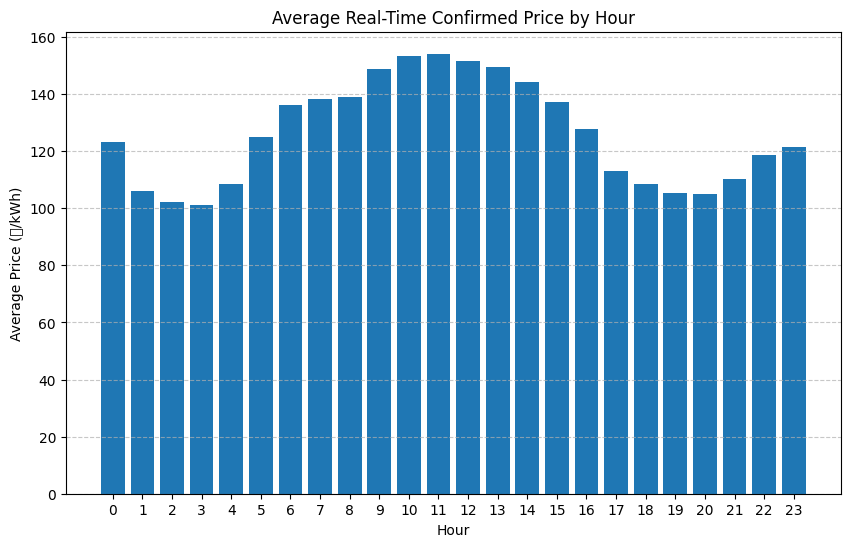

In [ ]:
import matplotlib.pyplot as plt

# Plotting the vertical bar chart using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(hourly_price_avg.index, hourly_price_avg.values)
plt.title("Average Real-Time Confirmed Price by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Price (원/kWh)")
plt.xticks(hourly_price_avg.index)  # Setting x-axis ticks to show each hour
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
merged_df_f1_f2

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,1709218800,1388000.0,798000.0,0.0,234165.0,248660.0,590000.0,266000.0,95.30,95.30
1,1709222400,1367000.0,765000.0,0.0,210320.0,226351.0,602000.0,277000.0,107.39,107.39
2,1709226000,1403000.0,736000.0,0.0,245230.0,261327.0,666000.0,342000.0,95.30,95.30
3,1709229600,1376000.0,727000.0,0.0,225240.0,239324.0,649000.0,323000.0,87.89,87.89
4,1709233200,1362000.0,741000.0,0.0,209575.0,223575.0,621000.0,297000.0,86.50,86.50
...,...,...,...,...,...,...,...,...,...,...
5554,1729508400,1060000.0,753000.0,0.0,98888.3,107037.0,302000.0,307000.0,156.43,155.32
5555,1729512000,1060000.0,718000.0,0.0,95198.2,103651.0,337000.0,258000.0,156.35,155.32
5556,1729515600,1043000.0,687000.0,0.0,79106.1,87497.3,352000.0,276000.0,155.89,154.80
5557,1729519200,1033000.0,663000.0,0.0,73191.7,81490.5,366000.0,290000.0,155.23,154.89


In [ ]:
import pandas as pd

# 실제 데이터프레임을 불러오는 코드 (사용자에 맞게 수정)
# 예를 들어, df = pd.read_csv("your_data.csv")

# 'ts'를 datetime 형식으로 변환하고, 월(month)만 추출
f2['ts'] = pd.to_datetime(f2['ts'], unit='s')
f2['month'] = f2['ts'].dt.month

# 월별로 "실시간 확정 가격(원/kWh)"의 평균, 최솟값, 최댓값, 표준편차 계산
monthly_analysis = f2.groupby('month')['실시간 확정 가격(원/kWh)'].agg(['mean', 'min', 'max', 'std'])

# 결과 출력
print(monthly_analysis)


             mean    min     max        std
month                                      
2       98.241111  86.50  111.40   9.910244
3      122.208374 -77.94  314.82  69.907494
4      125.237208 -79.32  250.02  47.779996
5       91.415108 -79.06  164.60  76.899993
6      122.164069 -75.58  186.27  35.309552
7      131.154570 -74.47  208.90  28.941853
8      147.795067 -74.92  228.19  24.381060
9      142.325889  92.19  312.61  24.774833
10     118.690551 -48.00  257.78  26.753830


In [ ]:
monthly_analysis

,mean,min,max,std
month,,,,
3,122.208374,-77.94,314.82,69.907494
4,125.237208,-79.32,250.02,47.779996
5,91.415108,-79.06,164.60,76.899993
6,122.164069,-75.58,186.27,35.309552
7,131.154570,-74.47,208.90,28.941853
8,147.795067,-74.92,228.19,24.381060
9,142.325889,92.19,312.61,24.774833
10,118.690551,-48.00,257.78,26.753830


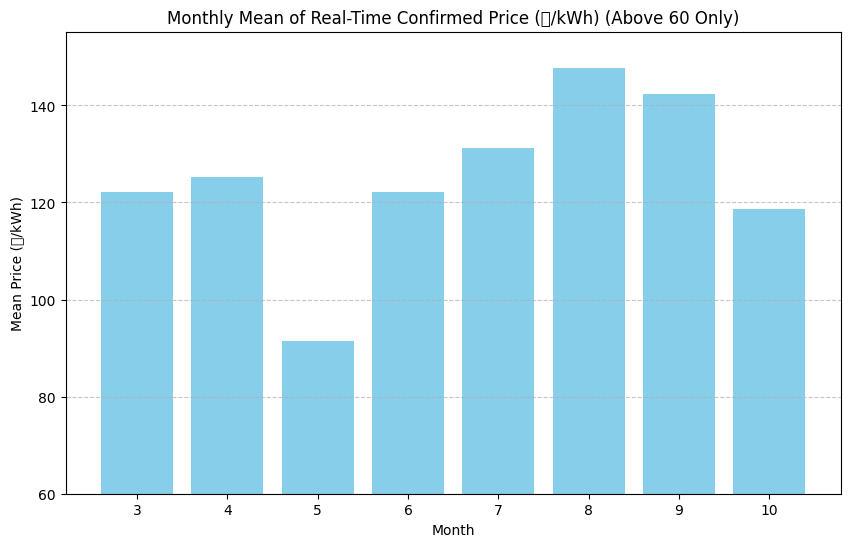

In [ ]:
# Plotting a vertical bar chart for the mean of "실시간 확정 가격(원/kWh)" by month
# Only plotting values above 60

plt.figure(figsize=(10, 6))
plt.bar(monthly_analysis[monthly_analysis['mean'] > 60].index, monthly_analysis[monthly_analysis['mean'] > 60]['mean'], color='skyblue')
plt.title("Monthly Mean of Real-Time Confirmed Price (원/kWh) (Above 60 Only)")
plt.xlabel("Month")
plt.ylabel("Mean Price (원/kWh)")
plt.xticks(monthly_analysis.index)  # Ensuring all months are labeled on the x-axis
plt.ylim(60)  # Setting lower limit to 60
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
merged_df_f2_f3

,ts,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),location,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,...,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,1709384400,325.74,311.94,Ilgwa-ri,6.1,1.1,1.1,53.0,-2.8,270.0,...,21.1,0.0,24.1,69.0,9144.0,1024.4,6.7,2.8,2.5,0.2
1,1709384400,325.74,311.94,Geumak-ri,3.4,-1.0,-1.0,50.0,-6.3,248.0,...,20.1,0.0,22.5,70.0,10363.0,1024.4,3.3,-0.6,-0.1,0.0
2,1709384400,325.74,311.94,Yongsu-ri,5.2,-0.1,-0.1,56.0,-2.8,293.0,...,24.0,0.0,49.9,76.0,7925.0,1023.8,5.6,1.1,2.0,0.0
3,1709384400,325.74,311.94,Hacheon-ri,4.4,3.4,3.4,55.0,-4.0,315.0,...,11.0,0.0,24.1,53.0,10058.0,1024.4,5.0,2.2,1.2,0.0
4,1709384400,325.74,311.94,Cheonji-dong,7.7,9.1,9.1,44.0,-4.0,203.0,...,5.1,0.0,49.9,11.0,7925.0,1023.3,8.3,7.8,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1724860800,128.88,128.88,Hacheon-ri,27.4,31.3,31.3,81.0,23.9,90.0,...,37.2,0.0,24.1,46.0,7071.0,1003.0,31.1,27.2,24.9,0.0
428,1724860800,128.88,128.88,Cheonji-dong,30.8,33.4,33.4,63.0,23.1,45.0,...,26.7,0.0,40.2,60.0,7071.0,1002.9,35.0,30.6,25.3,0.0
429,1724860800,128.88,128.88,Songdang-ri,26.2,30.7,30.7,90.0,24.5,23.0,...,34.4,0.0,22.5,42.0,7071.0,1003.4,28.9,26.1,25.0,0.0
430,1724860800,128.88,128.88,Gwangryeong-ri,26.7,29.8,29.8,82.0,23.4,68.0,...,30.2,0.0,19.3,51.0,5852.0,1004.1,30.0,26.7,24.4,0.0


In [ ]:
f3

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64652,Sangmo-ri,1729594920,20.0,18.0,18.0,100.0,20.0,293.0,37.8,37.8,0.0,14.5,76.0,579.0,1014.6,20.6,20.0,20.0,0.0
64653,Sangmo-ri,1729598520,19.8,16.9,16.9,100.0,19.8,293.0,41.8,41.8,0.0,14.5,91.0,579.0,1014.2,20.6,20.0,19.8,0.1
64654,Sangmo-ri,1729601760,21.2,18.5,18.5,92.0,19.9,315.0,49.7,49.7,0.0,22.5,99.0,457.0,1015.0,21.7,21.1,20.4,0.0
64655,Sangmo-ri,1729602120,19.6,16.7,16.7,100.0,19.6,315.0,49.7,49.7,0.0,22.5,99.0,518.0,1013.9,20.6,19.4,19.5,0.0


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 레이블 설정 (예: "실시간 확정 가격(원/kWh)")
label = '실시간 확정 가격(원/kWh)'

# 레이블을 제외한 나머지 데이터를 X로 설정
X = merged_df_f2_f3.drop(columns=[label,"실시간 임시 가격(원/kWh)","ts","location"])
y = merged_df_f2_f3[label]

# 데이터 스케일링 (PCA에 적합하도록 평균 0, 분산 1로 조정)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 객체 생성 및 주성분 분석 수행 (예: 주성분 2개로 설정)
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# 주성분 결과를 DataFrame으로 변환하여 확인
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df[label] = y.values  # 레이블 추가

# 주성분 기여율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# 주성분 분석 결과 출력
print(pca_df.head())


Explained variance ratio: [0.4646572  0.10847111 0.09760137 0.06161442 0.05907746 0.05238811
 0.04381911 0.03843965]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -6.961258 -0.015078  1.583875  0.313478 -0.744257  0.516936  0.337821   
1 -7.939167 -0.095773  1.516986  0.125320 -0.705130  0.120516  0.404987   
2 -7.348816  0.541726  1.500324  1.456409 -1.981777  1.728655  0.272541   
3 -7.236145 -0.533218  0.651751 -0.519528 -0.839316  1.000391  0.030954   
4 -6.549818  0.199607 -1.641058  1.197671 -2.043264  1.564490 -0.360281   

        PC8  실시간 확정 가격(원/kWh)  
0  0.652458            311.94  
1  0.863349            311.94  
2  0.193037            311.94  
3  0.481703            311.94  
4 -0.922211            311.94  


In [ ]:
sum([0.4646572,  0.10847111, 0.09760137, 0.06161442, 0.05907746, 0.05238811,0.04381911, 0.03843965])

0.92606843

In [ ]:
X['태양광 발전량kW)']

,태양광 발전량kW)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5554,0.0
5555,0.0
5556,0.0
5557,0.0


In [ ]:
merged_df_f2_f3

,ts,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),location,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,...,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,1709384400,325.74,311.94,Ilgwa-ri,6.1,1.1,1.1,53.0,-2.8,270.0,...,21.1,0.0,24.1,69.0,9144.0,1024.4,6.7,2.8,2.5,0.2
1,1709384400,325.74,311.94,Geumak-ri,3.4,-1.0,-1.0,50.0,-6.3,248.0,...,20.1,0.0,22.5,70.0,10363.0,1024.4,3.3,-0.6,-0.1,0.0
2,1709384400,325.74,311.94,Yongsu-ri,5.2,-0.1,-0.1,56.0,-2.8,293.0,...,24.0,0.0,49.9,76.0,7925.0,1023.8,5.6,1.1,2.0,0.0
3,1709384400,325.74,311.94,Hacheon-ri,4.4,3.4,3.4,55.0,-4.0,315.0,...,11.0,0.0,24.1,53.0,10058.0,1024.4,5.0,2.2,1.2,0.0
4,1709384400,325.74,311.94,Cheonji-dong,7.7,9.1,9.1,44.0,-4.0,203.0,...,5.1,0.0,49.9,11.0,7925.0,1023.3,8.3,7.8,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1724860800,128.88,128.88,Hacheon-ri,27.4,31.3,31.3,81.0,23.9,90.0,...,37.2,0.0,24.1,46.0,7071.0,1003.0,31.1,27.2,24.9,0.0
428,1724860800,128.88,128.88,Cheonji-dong,30.8,33.4,33.4,63.0,23.1,45.0,...,26.7,0.0,40.2,60.0,7071.0,1002.9,35.0,30.6,25.3,0.0
429,1724860800,128.88,128.88,Songdang-ri,26.2,30.7,30.7,90.0,24.5,23.0,...,34.4,0.0,22.5,42.0,7071.0,1003.4,28.9,26.1,25.0,0.0
430,1724860800,128.88,128.88,Gwangryeong-ri,26.7,29.8,29.8,82.0,23.4,68.0,...,30.2,0.0,19.3,51.0,5852.0,1004.1,30.0,26.7,24.4,0.0


In [ ]:
f3

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64652,Sangmo-ri,1729594920,20.0,18.0,18.0,100.0,20.0,293.0,37.8,37.8,0.0,14.5,76.0,579.0,1014.6,20.6,20.0,20.0,0.0
64653,Sangmo-ri,1729598520,19.8,16.9,16.9,100.0,19.8,293.0,41.8,41.8,0.0,14.5,91.0,579.0,1014.2,20.6,20.0,19.8,0.1
64654,Sangmo-ri,1729601760,21.2,18.5,18.5,92.0,19.9,315.0,49.7,49.7,0.0,22.5,99.0,457.0,1015.0,21.7,21.1,20.4,0.0
64655,Sangmo-ri,1729602120,19.6,16.7,16.7,100.0,19.6,315.0,49.7,49.7,0.0,22.5,99.0,518.0,1013.9,20.6,19.4,19.5,0.0


In [ ]:
merged_df_f2_f4

,ts,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),location,cloud,temp,temp_max,temp_min,humidity,ground_press,wind_speed,wind_dir,rain,snow
0,1714111200,142.58,142.58,Jeju,75.0,17.96,17.96,17.96,72.0,1010.0,4.12,50.0,0.0,0.0
1,1715619600,102.53,102.53,Jeju,0.0,11.96,11.96,11.96,66.0,1016.0,1.54,210.0,0.0,0.0
2,1723737600,139.87,139.87,Jeju,0.0,26.96,26.96,26.96,83.0,1008.0,1.03,70.0,7.49,0.0
3,1725616800,160.30,160.72,Jeju,75.0,28.96,28.96,28.96,74.0,1012.0,2.57,230.0,0.0,0.0


#모델 만들기

In [ ]:
merged_df_f1_f2 = pd.merge(f1, f2, on='ts', how='inner')
merged_df_f1_f2_f3 = pd.merge(merged_df_f1_f2, f3, on='ts', how='inner')

In [ ]:
y=merged_df_f1_f2["실시간 확정 가격(원/kWh)"]

In [ ]:
X=merged_df_f1_f2.drop(columns=["실시간 확정 가격(원/kWh)","실시간 임시 가격(원/kWh)","ts"])

In [ ]:
merged_df_f1_f2

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,1709218800,1388000.0,798000.0,0.0,234165.0,248660.0,590000.0,266000.0,95.30,95.30
1,1709222400,1367000.0,765000.0,0.0,210320.0,226351.0,602000.0,277000.0,107.39,107.39
2,1709226000,1403000.0,736000.0,0.0,245230.0,261327.0,666000.0,342000.0,95.30,95.30
3,1709229600,1376000.0,727000.0,0.0,225240.0,239324.0,649000.0,323000.0,87.89,87.89
4,1709233200,1362000.0,741000.0,0.0,209575.0,223575.0,621000.0,297000.0,86.50,86.50
...,...,...,...,...,...,...,...,...,...,...
5554,1729508400,1060000.0,753000.0,0.0,98888.3,107037.0,302000.0,307000.0,156.43,155.32
5555,1729512000,1060000.0,718000.0,0.0,95198.2,103651.0,337000.0,258000.0,156.35,155.32
5556,1729515600,1043000.0,687000.0,0.0,79106.1,87497.3,352000.0,276000.0,155.89,154.80
5557,1729519200,1033000.0,663000.0,0.0,73191.7,81490.5,366000.0,290000.0,155.23,154.89


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# 예시 데이터프레임 불러오기
# df = pd.read_csv("your_data.csv")

# 정규화할 열 선택
columns_to_normalize = X.columns  # 모든 열을 정규화하려면 이렇게 설정

# MinMaxScaler로 정규화
scaler = MinMaxScaler()
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# 정규화된 데이터프레임을 PyTorch 텐서로 변환

#X = torch.tensor(X.values, dtype=torch.float32)

# 모델에 넣기
# 예시: 모델 정의 및 데이터 전달
# model = NeuralNetwork().to(device)
# output = model(X.to(device))


In [ ]:
for i in training_data:
  print(i)
  break

(tensor([0.2697, 0.5794, 0.0057, 0.1256, 0.0843, 0.1848, 0.1233, 0.1137, 0.0516,
        0.0654, 0.2540, 0.1017, 0.7988, 0.4367, 0.2513, 0.0000, 0.4819, 0.6900,
        0.7129, 0.8993, 0.0938, 0.1018, 0.0922, 0.0148]), tensor(311.9400))


In [ ]:
test_X=X.tail(100)
test_y=y.tail(100)

train_X=X.head(300)
train_y=y.head(300)

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch
import numpy as np
from torch import nn


In [ ]:

class CustomImageDataset(Dataset):
    def __init__(self, X, y):
        # Ensure the data is numeric
        self.X = torch.tensor(np.array(X.values, dtype=np.float32))
        self.y = torch.tensor(np.array(y.values, dtype=np.float32))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
training_data=CustomImageDataset(train_X,train_y)
test_data=CustomImageDataset(test_X,test_y)

In [ ]:
batch_size = 64

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 24])
Shape of y: torch.Size([64]) torch.float32


In [ ]:
# 학습에 사용할 CPU나 GPU, MPS 장치를 얻습니다.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(24, 2**10),
            nn.ReLU(),
            nn.Linear(2**10, 2**10),
            nn.ReLU(),
            nn.Linear(2**10,2**5),
            nn.ReLU(),
            nn.Linear(2**5,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=24, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # `y`의 차원을 맞추기
        y = y.unsqueeze(1)  # (batch_size,) -> (batch_size, 1)

        # 예측 및 손실 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            # `y`의 차원을 맞추기
            y = y.unsqueeze(1)  # (batch_size,) -> (batch_size, 1)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} \n")


In [ ]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 2
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 3
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 4
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 5
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 6
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 7
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 8
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

Epoch 9
-------------------------------
loss: 25307.218750  [   64/  300]
Test Error: Avg loss: 23154.362305 

E

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64652,Sangmo-ri,1729594920,20.0,18.0,18.0,100.0,20.0,293.0,37.8,37.8,0.0,14.5,76.0,579.0,1014.6,20.6,20.0,20.0,0.0
64653,Sangmo-ri,1729598520,19.8,16.9,16.9,100.0,19.8,293.0,41.8,41.8,0.0,14.5,91.0,579.0,1014.2,20.6,20.0,19.8,0.1
64654,Sangmo-ri,1729601760,21.2,18.5,18.5,92.0,19.9,315.0,49.7,49.7,0.0,22.5,99.0,457.0,1015.0,21.7,21.1,20.4,0.0
64655,Sangmo-ri,1729602120,19.6,16.7,16.7,100.0,19.6,315.0,49.7,49.7,0.0,22.5,99.0,518.0,1013.9,20.6,19.4,19.5,0.0


In [ ]:
y

,실시간 확정 가격(원/kWh)
0,311.94
1,311.94
2,311.94
3,311.94
4,311.94
...,...
411,128.88
412,128.88
413,128.88
414,128.88


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd


# train/test split
train_X, test_X = X[:4500], X[4500:5000]
train_y, test_y = y[:4500], y[4500:5000]

# 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

train_X = scaler_X.fit_transform(train_X)
test_X = scaler_X.transform(test_X)

# y 값을 2차원 형태로 변경
train_y = scaler_y.fit_transform(train_y.values.reshape(-1, 1))
test_y = scaler_y.transform(test_y.values.reshape(-1, 1))

# 2. 데이터셋 및 DataLoader 정의
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 데이터로더 정의
batch_size = 64
train_dataset = CustomDataset(train_X, train_y)
test_dataset = CustomDataset(test_X, test_y)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. 모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2**10),
            nn.ReLU(),
            nn.Linear(2**10, 2**10),
            nn.ReLU(),
            nn.Linear(2**10, 2**7),
            nn.ReLU(),
            nn.Linear(2**7, 2**3),
            nn.ReLU(),
            nn.Linear(2**3, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

# 장치 설정
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
print(model)

# 4. 손실 함수 및 옵티마이저 정의
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)

# 5. 학습 함수 정의
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 및 손실 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            current = batch * len(X)
            print(f"loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")

# 6. 평가 함수 정의
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f}")

# 7. 학습 루프 실행
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")


NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): ReLU()
    (10): Linear(in_features=1024, out_features=128, bias=True)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=8, bias=True)
    (13): ReLU()
    (14): Linear(in_features=8, out_features=1, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 0.205788  [    0/ 4500]
loss: 0.227580  [  640/ 4500]
loss: 0.201707  [ 1280/ 4500]
loss: 0.215142  [ 1920/ 4500]
loss: 0.222591  [ 2560/ 4500]
loss: 0.222195  [ 3200/ 4500]
loss: 0.206235  [ 3840/ 4500]
loss: 0.191999  [ 1400/ 4500]
Test Error: Avg loss: 0.245295
Epoch 2
----------------

In [ ]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.016755  [    0/ 4500]
loss: 0.017395  [  640/ 4500]
loss: 0.012202  [ 1280/ 4500]
loss: 0.011125  [ 1920/ 4500]
loss: 0.013371  [ 2560/ 4500]
loss: 0.006468  [ 3200/ 4500]
loss: 0.023549  [ 3840/ 4500]
loss: 0.005180  [ 1400/ 4500]
Test Error: Avg loss: 0.003371
Epoch 2
-------------------------------
loss: 0.012827  [    0/ 4500]
loss: 0.017668  [  640/ 4500]
loss: 0.008655  [ 1280/ 4500]
loss: 0.008638  [ 1920/ 4500]
loss: 0.016990  [ 2560/ 4500]
loss: 0.010440  [ 3200/ 4500]
loss: 0.008896  [ 3840/ 4500]
loss: 0.001342  [ 1400/ 4500]
Test Error: Avg loss: 0.003304
Epoch 3
-------------------------------
loss: 0.020113  [    0/ 4500]
loss: 0.011232  [  640/ 4500]
loss: 0.011280  [ 1280/ 4500]
loss: 0.003653  [ 1920/ 4500]
loss: 0.011100  [ 2560/ 4500]
loss: 0.012724  [ 3200/ 4500]
loss: 0.009895  [ 3840/ 4500]
loss: 0.012655  [ 1400/ 4500]
Test Error: Avg loss: 0.003303
Epoch 4
-------------------------------
loss: 0.008283  [    0/ 450

In [ ]:
X

,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),temp,real_feel_temp,real_feel_temp_shade,...,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,6.1,1.1,1.1,...,21.1,0.0,24.1,69.0,9144.0,1024.4,6.7,2.8,2.5,0.2
1,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,3.4,-1.0,-1.0,...,20.1,0.0,22.5,70.0,10363.0,1024.4,3.3,-0.6,-0.1,0.0
2,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,5.2,-0.1,-0.1,...,24.0,0.0,49.9,76.0,7925.0,1023.8,5.6,1.1,2.0,0.0
3,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,4.4,3.4,3.4,...,11.0,0.0,24.1,53.0,10058.0,1024.4,5.0,2.2,1.2,0.0
4,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,7.7,9.1,9.1,...,5.1,0.0,49.9,11.0,7925.0,1023.3,8.3,7.8,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,27.4,31.3,31.3,...,37.2,0.0,24.1,46.0,7071.0,1003.0,31.1,27.2,24.9,0.0
412,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,30.8,33.4,33.4,...,26.7,0.0,40.2,60.0,7071.0,1002.9,35.0,30.6,25.3,0.0
413,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,26.2,30.7,30.7,...,34.4,0.0,22.5,42.0,7071.0,1003.4,28.9,26.1,25.0,0.0
414,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,26.7,29.8,29.8,...,30.2,0.0,19.3,51.0,5852.0,1004.1,30.0,26.7,24.4,0.0


In [ ]:
import numpy as np
import torch
import pandas as pd

# 예측 결과를 저장할 리스트 초기화
predictions = []

# 새 데이터 포인트를 하나씩 예측하고 결과를 저장
for _, new_data in X.iloc[5000:].iterrows():
    # 1. 데이터 정규화 (훈련 데이터에서 사용한 scaler로 변환)
    new_data = np.array(new_data).reshape(1, -1)  # 2차원 배열로 변환
    new_data = scaler_X.transform(new_data)

    # 2. numpy 배열을 PyTorch 텐서로 변환
    new_data_tensor = torch.tensor(new_data, dtype=torch.float32).to(device)

    # 3. 모델 예측
    model.eval()
    with torch.no_grad():
        prediction = model(new_data_tensor)

    # 4. 예측 결과를 원래 스케일로 되돌리기
    prediction = scaler_y.inverse_transform(prediction.cpu().numpy())

    # 예측 결과를 리스트에 추가
    predictions.append(prediction[0][0])

# 예측 결과를 데이터프레임으로 변환
predictions_df = pd.DataFrame({
    'Predicted Value': predictions
})

# 테이블 형태로 출력
print(predictions_df)

# 예측 결과를 CSV 파일로 저장 (선택 사항)
predictions_df.to_csv("predicted_values.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScal

     Predicted Value
0         150.668060
1         152.136368
2         149.125717
3         144.167496
4         139.643692
..               ...
554       138.116791
555       132.884628
556       130.311737
557       127.723701
558       121.574875

[559 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 5000번째 데이터부터 마지막 데이터까지 준비
eval_X = X[5000:]
eval_y = y[5000:]

# 데이터를 정규화합니다. 기존에 사용했던 `scaler_X`와 `scaler_y`를 그대로 사용하여 변환합니다.
eval_X = scaler_X.transform(eval_X)
eval_y = scaler_y.transform(eval_y.values.reshape(-1, 1))

# 평가용 데이터셋 및 DataLoader 정의
eval_dataset = CustomDataset(eval_X, eval_y)
eval_dataloader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

# 손실 계산 함수 정의
def evaluate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
    avg_loss = total_loss / num_batches
    print(f"Evaluation Loss on data from 5000th row to last row: {avg_loss:.6f}")

# 손실 계산 실행
evaluate(eval_dataloader, model, loss_fn)


Evaluation Loss on data from 5000th row to last row: 0.005739


In [ ]:
row_data = X.iloc[5:100]

In [ ]:
row_data

,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),temp,real_feel_temp,real_feel_temp_shade,...,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
5,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,2.7,2.7,2.7,...,12.5,0.0,22.5,57.0,9144.0,1024.4,2.8,1.1,-0.2,0.0
6,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,5.8,7.0,7.0,...,16.3,0.0,19.3,76.0,9144.0,1024.4,6.1,5.6,1.9,0.0
7,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,6.7,0.9,0.9,...,19.5,0.0,22.5,67.0,7925.0,1024.4,7.2,3.3,2.8,0.2
8,1232000.0,736000.0,24996.00,118503.0,159320.0,496000.0,289000.0,5.6,4.9,3.3,...,11.2,2.0,16.1,72.0,10058.0,1022.7,6.1,3.3,1.8,0.0
9,1232000.0,736000.0,24996.00,118503.0,159320.0,496000.0,289000.0,2.7,1.1,-0.7,...,14.3,2.0,16.1,62.0,9144.0,1022.7,2.8,-0.6,-0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1221000.0,553000.0,193392.00,0.0,207018.0,668000.0,408000.0,19.3,23.7,18.7,...,5.8,5.0,16.1,0.0,10180.0,1016.3,19.4,19.4,14.2,0.0
96,1026000.0,681000.0,0.00,18853.7,34592.9,345000.0,237000.0,18.5,17.4,17.4,...,10.5,0.0,16.1,46.0,6096.0,1015.9,20.0,18.3,16.8,0.0
97,1026000.0,681000.0,0.00,18853.7,34592.9,345000.0,237000.0,16.0,14.9,14.9,...,12.2,0.0,16.1,42.0,10363.0,1015.9,18.3,16.1,13.0,0.0
98,1026000.0,681000.0,0.00,18853.7,34592.9,345000.0,237000.0,21.8,20.3,20.3,...,12.3,0.0,48.3,52.0,11582.0,1015.1,21.7,21.7,15.5,0.0


In [ ]:
X

,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),temp,real_feel_temp,real_feel_temp_shade,...,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,6.1,1.1,1.1,...,21.1,0.0,24.1,69.0,9144.0,1024.4,6.7,2.8,2.5,0.2
1,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,3.4,-1.0,-1.0,...,20.1,0.0,22.5,70.0,10363.0,1024.4,3.3,-0.6,-0.1,0.0
2,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,5.2,-0.1,-0.1,...,24.0,0.0,49.9,76.0,7925.0,1023.8,5.6,1.1,2.0,0.0
3,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,4.4,3.4,3.4,...,11.0,0.0,24.1,53.0,10058.0,1024.4,5.0,2.2,1.2,0.0
4,1166000.0,879000.0,1595.93,25611.4,41272.2,286000.0,198000.0,7.7,9.1,9.1,...,5.1,0.0,49.9,11.0,7925.0,1023.3,8.3,7.8,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,27.4,31.3,31.3,...,37.2,0.0,24.1,46.0,7071.0,1003.0,31.1,27.2,24.9,0.0
412,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,30.8,33.4,33.4,...,26.7,0.0,40.2,60.0,7071.0,1002.9,35.0,30.6,25.3,0.0
413,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,26.2,30.7,30.7,...,34.4,0.0,22.5,42.0,7071.0,1003.4,28.9,26.1,25.0,0.0
414,1462000.0,713000.0,0.00,171160.0,182964.0,749000.0,380000.0,26.7,29.8,29.8,...,30.2,0.0,19.3,51.0,5852.0,1004.1,30.0,26.7,24.4,0.0


In [ ]:
merged_df_f1_f2_f3.tail(47)

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),...,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
369,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,28.3,1.0,19.3,78.0,732.0,1009.5,33.3,28.3,25.9,3.0
370,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,30.0,2.0,22.5,88.0,7925.0,1009.2,35.0,28.3,27.2,0.0
371,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,21.8,3.0,24.1,55.0,9144.0,1009.8,40.0,31.1,28.2,0.0
372,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,16.0,1.0,29.0,91.0,61.0,1010.1,38.3,28.9,28.2,0.0
373,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,22.1,2.0,22.5,65.0,9144.0,1009.8,40.6,30.6,28.8,0.0
374,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,21.3,1.0,17.7,76.0,518.0,1009.8,38.3,31.7,26.6,2.3
375,1724223600,1528000.0,1083000.0,153359.00,98203.6,264523.0,445000.0,336000.0,178.51,178.51,...,26.2,2.0,19.3,80.0,7925.0,1009.5,39.4,30.6,28.0,0.0
376,1724230800,1404000.0,1119000.0,45786.90,82030.8,141329.0,286000.0,204000.0,157.89,158.59,...,24.9,0.0,16.1,72.0,9144.0,1010.2,41.7,32.2,28.3,0.0
377,1724230800,1404000.0,1119000.0,45786.90,82030.8,141329.0,286000.0,204000.0,157.89,158.59,...,24.7,0.0,16.1,86.0,732.0,1010.2,32.8,29.4,24.5,0.0
378,1724230800,1404000.0,1119000.0,45786.90,82030.8,141329.0,286000.0,204000.0,157.89,158.59,...,24.5,0.0,17.7,76.0,9144.0,1009.6,35.0,28.9,26.7,0.0


In [ ]:
merged_df_f1_f2.tail(30)

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
5529,1729418400,1321000.0,675000.0,3938.30,207545.0,219558.0,637000.0,251000.0,109.15,109.15
5530,1729422000,1318000.0,647000.0,2205.09,208556.0,219012.0,641000.0,279000.0,109.15,109.15
5531,1729425600,1271000.0,603000.0,0.00,160785.0,169212.0,618000.0,223000.0,101.70,101.70
5532,1729429200,1230000.0,578000.0,0.00,118925.0,127272.0,602000.0,203000.0,101.75,101.75
5533,1729432800,1257000.0,556000.0,0.00,146943.0,155233.0,651000.0,254000.0,100.72,100.72
5534,1729436400,1252000.0,520000.0,0.00,146067.0,154319.0,682000.0,286000.0,100.72,100.72
5535,1729440000,1184000.0,488000.0,0.00,80774.4,89024.9,645000.0,251000.0,94.05,94.05
5536,1729443600,1176000.0,473000.0,0.00,67209.1,75376.4,652000.0,257000.0,85.16,85.16
5537,1729447200,1179000.0,472000.0,0.00,71364.4,79525.2,667000.0,260000.0,83.75,83.75
5538,1729450800,1194000.0,466000.0,0.00,87404.2,95523.2,688000.0,281000.0,85.16,85.16


In [ ]:
from sklearn.metrics import mean_absolute_error

# 5000번째 데이터부터 마지막 데이터까지 준비
eval_X = X[5000:]
eval_y = y[5000:]

# 데이터를 정규화합니다. 기존에 사용했던 `scaler_X`와 `scaler_y`를 그대로 사용하여 변환합니다.
eval_X = scaler_X.transform(eval_X)
eval_y = scaler_y.transform(eval_y.values.reshape(-1, 1))

# 평가용 데이터셋 및 DataLoader 정의
eval_dataset = CustomDataset(eval_X, eval_y)
eval_dataloader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

# 실제 오차 계산 함수 정의
def calculate_actual_error(dataloader, model, scaler_y):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            # 예측 값과 실제 값을 리스트에 추가
            predictions.extend(pred.cpu().numpy())
            actuals.extend(y.cpu().numpy())

    # 스케일 역변환
    predictions = scaler_y.inverse_transform(predictions)
    actuals = scaler_y.inverse_transform(actuals)

    # 평균 절대 오차 계산
    mae = mean_absolute_error(actuals, predictions)
    print(f"Mean Absolute Error (원래 스케일): {mae:.4f}")

# 실제 오차 계산 실행
calculate_actual_error(eval_dataloader, model, scaler_y)


Mean Absolute Error (원래 스케일): 21.7730
